# Option data: descriptive analysis

- loading data from csv files takes quite a while

In [1]:
@time include("../startup_script2.jl")

elapsed time: 0.45769307 seconds (52396772 bytes allocated, 6.66% gc time)
elapsed time: 53.49237178 seconds (5419744236 bytes allocated, 73.56% gc time)
elapsed time: 0.700935702 seconds (112671656 bytes allocated, 58.14% gc time)
elapsed time: 70.691201926 seconds (5419744236 bytes allocated, 79.37% gc time)
elapsed time: 147.05446535 seconds (14792979644 bytes allocated, 67.44% gc time)
elapsed time: 85.393871735 seconds (5419744236 bytes allocated, 82.81% gc time)
elapsed time: 99.880646475 seconds (5419744236 bytes allocated, 85.05% gc time)
elapsed time: 363.827100325 seconds (30386868672 bytes allocated, 74.24% gc time)


6x3 DataFrame
| Row | Date       | ID                | IV |
|-----|------------|-------------------|----|
| 1   | 2006-07-03 | "c_20060721_4500" | NA |
| 2   | 2006-07-04 | "c_20060721_4500" | NA |
| 3   | 2006-07-05 | "c_20060721_4500" | NA |
| 4   | 2006-07-06 | "c_20060721_4500" | NA |
| 5   | 2006-07-07 | "c_20060721_4500" | NA |
| 6   | 2006-07-10 | "c_20060721_4500" | NA |

- option prices are observed during the following time range:

In [2]:
minimum(optPrices[:Date]), maximum(optPrices[:Date])

(2006-07-03,2013-12-30)

- expiration dates are within:

In [3]:
minimum(opts[:Expiry]), maximum(opts[:Expiry])

(2006-07-21,2014-12-19)

### Relational database

- originally data was given as single table

In [4]:
origData = join(optPrices, opts, on = :ID) |>
x -> join(x, cohortParams, on = [:Date, :Expiry]) |>
x -> join(x, daxVals, on = [:Date]) |>
x -> join(x, addObs, on = [:Date, :ID])

2025129x13 DataFrame
| Row     | Date       | ID                | Price  | Expiry     | Strike |
|---------|------------|-------------------|--------|------------|--------|
| 1       | 2006-07-03 | "c_20060721_4500" | 1212.0 | 2006-07-21 | 4500   |
| 2       | 2006-07-04 | "c_20060721_4500" | 1232.6 | 2006-07-21 | 4500   |
| 3       | 2006-07-05 | "c_20060721_4500" | 1131.1 | 2006-07-21 | 4500   |
| 4       | 2006-07-06 | "c_20060721_4500" | 1197.0 | 2006-07-21 | 4500   |
| 5       | 2006-07-07 | "c_20060721_4500" | 1185.1 | 2006-07-21 | 4500   |
| 6       | 2006-07-10 | "c_20060721_4500" | 1210.3 | 2006-07-21 | 4500   |
| 7       | 2006-07-11 | "c_20060721_4500" | 1125.9 | 2006-07-21 | 4500   |
| 8       | 2006-07-12 | "c_20060721_4500" | 1134.8 | 2006-07-21 | 4500   |
| 9       | 2006-07-13 | "c_20060721_4500" | 1032.0 | 2006-07-21 | 4500   |
| 10      | 2006-07-14 | "c_20060721_4500" | 928.4  | 2006-07-21 | 4500   |
| 11      | 2006-07-17 | "c_20060721_4500" | 916.1  | 2006-07-21 | 4500   |
⋮
| 2025118 | 2013-12-13 | "p_20141219_9800" | 1042.7 | 2014-12-19 | 9800   |
| 2025119 | 2013-12-16 | "p_20141219_9800" | 951.4  | 2014-12-19 | 9800   |
| 2025120 | 2013-12-17 | "p_20141219_9800" | 984.1  | 2014-12-19 | 9800   |
| 2025121 | 2013-12-18 | "p_20141219_9800" | 928.0  | 2014-12-19 | 9800   |
| 2025122 | 2013-12-19 | "p_20141219_9800" | 828.1  | 2014-12-19 | 9800   |
| 2025123 | 2013-12-20 | "p_20141219_9800" | 781.5  | 2014-12-19 | 9800   |
| 2025124 | 2013-12-23 | "p_20141219_9800" | 734.4  | 2014-12-19 | 9800   |
| 2025125 | 2013-12-27 | "p_20141219_9800" | 681.3  | 2014-12-19 | 9800   |
| 2025126 | 2013-12-30 | "p_20141219_9800" | 676.4  | 2014-12-19 | 9800   |
| 2025127 | 2013-12-23 | "p_20141219_9900" | 787.9  | 2014-12-19 | 9900   |
| 2025128 | 2013-12-27 | "p_20141219_9900" | 731.4  | 2014-12-19 | 9900   |
| 2025129 | 2013-12-30 | "p_20141219_9900" | 726.6  | 2014-12-19 | 9900   |

| Row     | IsCall | EONIA_matched | Time_to_Maturity | DAX     | Bid    |
|---------|--------|---------------|------------------|---------|--------|
| 1       | true   | 0.0283102     | 0.054902         | 5712.69 | NA     |
| 2       | true   | 0.0282186     | 0.0509804        | 5729.01 | NA     |
| 3       | true   | 0.0281096     | 0.0470588        | 5625.63 | NA     |
| 4       | true   | 0.0281618     | 0.0431373        | 5695.47 | NA     |
| 5       | true   | 0.0281131     | 0.0392157        | 5681.85 | NA     |
| 6       | true   | 0.0281756     | 0.0352941        | 5706.32 | NA     |
| 7       | true   | 0.0281528     | 0.0313725        | 5616.04 | NA     |
| 8       | true   | 0.028146      | 0.027451         | 5637.82 | NA     |
| 9       | true   | 0.0281553     | 0.0235294        | 5527.29 | NA     |
| 10      | true   | 0.0281209     | 0.0196078        | 5422.22 | NA     |
| 11      | true   | 0.0281209     | 0.0156863        | 5416.96 | NA     |
⋮
| 2025118 | false  | 0.0055446     | 1.01961          | 9006.46 | 1033.0 |
| 2025119 | false  | 0.00561421    | 1.01569          | 9163.56 | 937.7  |
| 2025120 | false  | 0.00565399    | 1.01176          | 9085.12 | 977.6  |
| 2025121 | false  | 0.0056341     | 1.00784          | 9181.75 | 919.2  |
| 2025122 | false  | 0.00556449    | 1.00392          | 9335.74 | 825.7  |
| 2025123 | false  | 0.00557443    | 1.0              | 9400.18 | 774.7  |
| 2025124 | false  | 0.00559555    | 0.996078         | 9488.82 | 726.7  |
| 2025125 | false  | 0.00558578    | 0.992157         | 9589.39 | 674.9  |
| 2025126 | false  | 0.00553263    | 0.988235         | 9552.16 | 678.4  |
| 2025127 | false  | 0.00559555    | 0.996078         | 9488.82 | 774.7  |
| 2025128 | false  | 0.00558578    | 0.992157         | 9589.39 | 726.1  |
| 2025129 | false  | 0.00553263    | 0.988235         | 9552.16 | 729.6  |

| Row     | Ask    | Volume | Open_Interest |
|---------|--------|--------|---------------|
| 1       | NA     | 0      | 127           |
| 2       | NA     | 0      | 127           |
| 3       | NA

- number of puts and calls: options

In [5]:
nOpts, nCalls, nPuts = size(opts, 1), size(opts[opts[:IsCall], :], 1), size(opts[!opts[:IsCall], :], 1)
println("The sample consists of data on $nOpts options:")
println("- $nCalls call options")
println("- $nPuts put options")

The sample consists of data on 12917 options:
- 6321 call options
- 6596 put options


- observations:

In [6]:
nObs, nCallObs, nPutObs = size(origData, 1), size(origData[origData[:IsCall], :], 1), size(origData[!origData[:IsCall], :], 1)
println("The sample consists of $nObs observations:")
println("- call options: $nCallObs observations")
println("- put options: $nPutObs observations")

The sample consists of 2025129 observations:
- call options: 987878 observations
- put options: 1037251 observations


- number of missing values per column:

In [7]:
nNAs = DataFrame()
nNAsFreq = DataFrame()
for (nm, dat) in eachcol(origData)
    nNAs[nm] = sum(isna(dat))
    nNAsFreq[nm] = sum(isna(dat))/nObs
end

In [8]:
nNAs[[:Bid, :Ask, :Volume]]

1x3 DataFrame
| Row | Bid     | Ask     | Volume |
|-----|---------|---------|--------|
| 1   | 1597934 | 1574162 | 11     |

In [9]:
nNAsFreq[[:Bid, :Ask, :Volume]]

1x3 DataFrame
| Row | Bid      | Ask      | Volume     |
|-----|----------|----------|------------|
| 1   | 0.789053 | 0.777314 | 5.43175e-6 |

### Volume data

In [10]:
naObs = isna(origData[:Volume])
origData[naObs, [:Date, :IsCall, :Strike, :DAX, :Time_to_Maturity]]

11x5 DataFrame
| Row | Date       | IsCall | Strike | DAX     | Time_to_Maturity |
|-----|------------|--------|--------|---------|------------------|
| 1   | 2008-05-22 | true   | 7000   | 7070.33 | 0.337255         |
| 2   | 2008-05-23 | true   | 7000   | 6944.05 | 0.333333         |
| 3   | 2007-11-27 | true   | 7800   | 7531.35 | 0.803922         |
| 4   | 2008-05-22 | true   | 7800   | 7070.33 | 0.337255         |
| 5   | 2008-05-23 | true   | 7800   | 6944.05 | 0.333333         |
| 6   | 2007-11-27 | true   | 8800   | 7531.35 | 0.803922         |
| 7   | 2008-05-22 | true   | 8800   | 7070.33 | 0.337255         |
| 8   | 2008-05-23 | true   | 8800   | 6944.05 | 0.333333         |
| 9   | 2007-11-27 | false  | 8800   | 7531.35 | 0.803922         |
| 10  | 2008-05-22 | false  | 8800   | 7070.33 | 0.337255         |
| 11  | 2008-05-23 | false  | 8800   | 6944.05 | 0.333333         |

- many entries with zero volume

In [11]:
sum(convert(Array, origData[:Volume] .== 0, false)) / nObs

0.7067263369395234

- plot non-zero values

In [12]:
using Gadfly

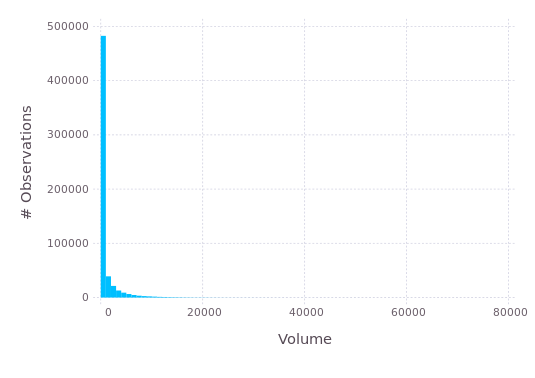

In [13]:
nonZeroInds = convert(Array, origData[:Volume] .!= 0, false)

currPlot = Gadfly.plot(x=origData[:Volume][nonZeroInds], Gadfly.Geom.histogram, 
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), minvalue=0, maxvalue=80000),
Guide.xlabel("Volume"),
Guide.ylabel("# Observations"))

In [14]:
draw(SVG("../pics/volume_hist.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/volume_hist.pdf", 20cm, 14cm), currPlot)

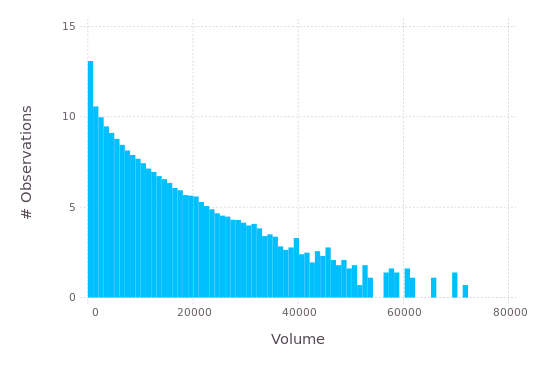

In [15]:
currPlot = Gadfly.plot(x=origData[:Volume][nonZeroInds], Gadfly.Geom.histogram,
Scale.y_log(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), minvalue=0, maxvalue=80000),
Guide.xlabel("Volume"),
Guide.ylabel("# Observations"))

In [16]:
draw(SVG("../pics/volume_log_hist.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/volume_log_hist.pdf", 20cm, 14cm), currPlot)

- display volumes greater than 70,000

In [17]:
largeVols = DataFrame(Volume = sort(origData[convert(Array, origData[:Volume] .> 70000, false), :Volume], rev=true))


12x1 DataFrame
| Row | Volume |
|-----|--------|
| 1   | 149504 |
| 2   | 126367 |
| 3   | 103815 |
| 4   | 88041  |
| 5   | 86313  |
| 6   | 78254  |
| 7   | 77251  |
| 8   | 73883  |
| 9   | 73029  |
| 10  | 72047  |
| 11  | 71615  |
| 12  | 70036  |

### Open interest

- no missing values
- no zero values
- histogram of open interest values

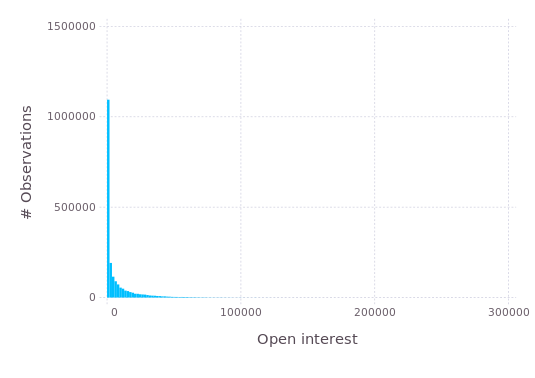

In [18]:
currPlot = Gadfly.plot(x=origData[:Open_Interest], Gadfly.Geom.histogram,
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), minvalue=0),
Guide.xlabel("Open interest"),
Guide.ylabel("# Observations"))

In [19]:
draw(SVG("../pics/open_interest_hist.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/open_interest_hist.pdf", 20cm, 14cm), currPlot)

- on log scale

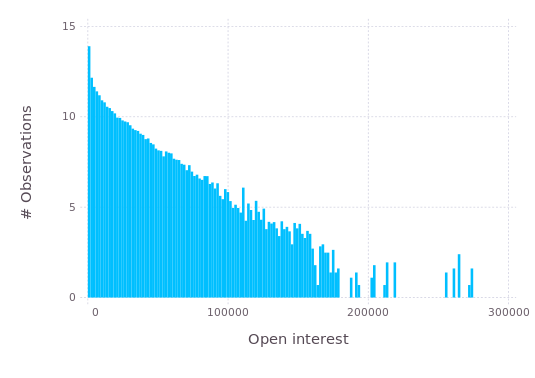

In [20]:
currPlot = Gadfly.plot(x=origData[:Open_Interest], Gadfly.Geom.histogram,
Scale.y_log(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), minvalue=0),
Guide.xlabel("Open interest"),
Guide.ylabel("# Observations"))

In [21]:
draw(SVG("../pics/open_interest_log_hist.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/open_interest_log_hist.pdf", 20cm, 14cm), currPlot)

- show paths for random options

In [22]:
# pick random option
nRndOpts = 10
nOpts = size(opts, 1)
rndOpt = Int[rand(1:nOpts) for ii=1:nRndOpts]

10-element Array{Int64,1}:
  6591
   884
 11167
 11570
  9944
 11609
  3404
  6495
  6797
 11637

In [23]:
# get associated observations
optName = opts[rndOpt, :ID]

10-element DataArray{UTF8String,1}:
 "p_20100115_4950"
 "p_20091218_5400"
 "c_20130920_7800"
 "c_20130517_7550"
 "p_20121221_6350"
 "p_20130517_7150"
 "c_20080418_6500"
 "p_20091120_6250"
 "c_20101217_5450"
 "p_20130315_8150"

In [24]:
rndOptObs = falses(nObs)
for kk=1:nRndOpts
    rndOptObs[origData[:ID] .== optName[kk]] = true
end

In [25]:
rndOptData = origData[rndOptObs, :]

1826x13 DataFrame
| Row  | Date       | ID                | Price | Expiry     | Strike | IsCall |
|------|------------|-------------------|-------|------------|--------|--------|
| 1    | 2008-01-25 | "c_20080418_6500" | 583.4 | 2008-04-18 | 6500   | true   |
| 2    | 2008-01-28 | "c_20080418_6500" | 577.5 | 2008-04-18 | 6500   | true   |
| 3    | 2008-01-29 | "c_20080418_6500" | 623.0 | 2008-04-18 | 6500   | true   |
| 4    | 2008-01-30 | "c_20080418_6500" | 615.9 | 2008-04-18 | 6500   | true   |
| 5    | 2008-01-31 | "c_20080418_6500" | 602.1 | 2008-04-18 | 6500   | true   |
| 6    | 2008-02-01 | "c_20080418_6500" | 657.8 | 2008-04-18 | 6500   | true   |
| 7    | 2008-02-04 | "c_20080418_6500" | 681.9 | 2008-04-18 | 6500   | true   |
| 8    | 2008-02-05 | "c_20080418_6500" | 521.9 | 2008-04-18 | 6500   | true   |
| 9    | 2008-02-06 | "c_20080418_6500" | 582.4 | 2008-04-18 | 6500   | true   |
| 10   | 2008-02-07 | "c_20080418_6500" | 503.6 | 2008-04-18 | 6500   | true   |
| 11   | 2008-02-08 | "c_20080418_6500" | 531.5 | 2008-04-18 | 6500   | true   |
⋮
| 1815 | 2013-04-30 | "p_20130517_7150" | 5.2   | 2013-05-17 | 7150   | false  |
| 1816 | 2013-05-02 | "p_20130517_7150" | 3.2   | 2013-05-17 | 7150   | false  |
| 1817 | 2013-05-03 | "p_20130517_7150" | 1.9   | 2013-05-17 | 7150   | false  |
| 1818 | 2013-05-06 | "p_20130517_7150" | 2.4   | 2013-05-17 | 7150   | false  |
| 1819 | 2013-05-07 | "p_20130517_7150" | 1.9   | 2013-05-17 | 7150   | false  |
| 1820 | 2013-05-08 | "p_20130517_7150" | 1.4   | 2013-05-17 | 7150   | false  |
| 1821 | 2013-05-09 | "p_20130517_7150" | 0.9   | 2013-05-17 | 7150   | false  |
| 1822 | 2013-05-10 | "p_20130517_7150" | 0.9   | 2013-05-17 | 7150   | false  |
| 1823 | 2013-05-13 | "p_20130517_7150" | 0.4   | 2013-05-17 | 7150   | false  |
| 1824 | 2013-05-14 | "p_20130517_7150" | 0.3   | 2013-05-17 | 7150   | false  |
| 1825 | 2013-05-15 | "p_20130517_7150" | 0.1   | 2013-05-17 | 7150   | false  |
| 1826 | 2013-05-16 | "p_20130517_7150" | 0.2   | 2013-05-17 | 7150   | false  |

| Row  | EONIA_matched | Time_to_Maturity | DAX     | Bid | Ask  | Volume |
|------|---------------|------------------|---------|-----|------|--------|
| 1    | 0.0427087     | 0.227451         | 6816.74 | NA  | NA   | 7      |
| 2    | 0.0426336     | 0.223529         | 6818.85 | NA  | NA   | 0      |
| 3    | 0.0426277     | 0.219608         | 6892.96 | NA  | NA   | 82     |
| 4    | 0.0425574     | 0.215686         | 6875.35 | NA  | NA   | 0      |
| 5    | 0.0424702     | 0.211765         | 6851.75 | NA  | NA   | 0      |
| 6    | 0.0423825     | 0.207843         | 6968.67 | NA  | NA   | 0      |
| 7    | 0.0423329     | 0.203922         | 7000.49 | NA  | NA   | 0      |
| 8    | 0.0423155     | 0.2              | 6765.25 | NA  | NA   | 0      |
| 9    | 0.0422082     | 0.196078         | 6847.51 | NA  | NA   | 0      |
| 10   | 0.0421298     | 0.192157         | 6733.72 | NA  | NA   | 0      |
| 11   | 0.0419618     | 0.188235         | 6767.28 | NA  | NA   | 0      |
⋮
| 1815 | 0.000967019   | 0.0470588        | 7913.71 | 4.5 | 50.0 | 72     |
| 1816 | 0.000946561   | 0.0431373        | 7961.71 | 1.7 | 4.2  | 280    |
| 1817 | 0.000915428   | 0.0392157        | 8122.29 | 1.4 | 3.0  | 180    |
| 1818 | 0.000890411   | 0.0352941        | 8112.08 | NA  | NA   | 0      |
| 1819 | 0.000876724   | 0.0313725        | 8181.78 | NA  | NA   | 1200   |
| 1820 | 0.000860161   | 0.027451         | 8249.71 | NA  | NA   | 403    |
| 1821 | 0.000844246   | 0.0235294        | 8262.55 | NA  | NA   | 0      |
| 1822 | 0.000829656   | 0.0196078        | 8278.59 | NA  | NA   | 0      |
| 1823 | 0.000829656   | 0.0156863        | 8279.29 | NA  | NA   | 0      |
| 1824 | 0.000829656   | 0.0117647        | 8339.11 | NA  | 0.5  | 10     |
| 1825 | 0.000829656   | 0.00784314       | 8362.42 | NA  | 0.5  | 0      |
| 1826 | 0.000829656   | 0.00392157       | 8369.87 | NA  | 0.5  | 0      |

| Row  | Open_Interest |
|------|---------------|
|

In [26]:
plotData = rndOptData[[:Open_Interest, :Time_to_Maturity, :ID]]
plotData[:Time_to_Maturity] = round(plotData[:Time_to_Maturity]*255*(-1))

plotData

1826x3 DataFrame
| Row  | Open_Interest | Time_to_Maturity | ID                |
|------|---------------|------------------|-------------------|
| 1    | 7             | -58.0            | "c_20080418_6500" |
| 2    | 7             | -57.0            | "c_20080418_6500" |
| 3    | 89            | -56.0            | "c_20080418_6500" |
| 4    | 89            | -55.0            | "c_20080418_6500" |
| 5    | 89            | -54.0            | "c_20080418_6500" |
| 6    | 89            | -53.0            | "c_20080418_6500" |
| 7    | 89            | -52.0            | "c_20080418_6500" |
| 8    | 89            | -51.0            | "c_20080418_6500" |
| 9    | 89            | -50.0            | "c_20080418_6500" |
| 10   | 89            | -49.0            | "c_20080418_6500" |
| 11   | 89            | -48.0            | "c_20080418_6500" |
⋮
| 1815 | 2662          | -12.0            | "p_20130517_7150" |
| 1816 | 2596          | -11.0            | "p_20130517_7150" |
| 1817 | 2531          | -10.0            | "p_20130517_7150" |
| 1818 | 2531          | -9.0             | "p_20130517_7150" |
| 1819 | 3651          | -8.0             | "p_20130517_7150" |
| 1820 | 4034          | -7.0             | "p_20130517_7150" |
| 1821 | 4034          | -6.0             | "p_20130517_7150" |
| 1822 | 4034          | -5.0             | "p_20130517_7150" |
| 1823 | 4034          | -4.0             | "p_20130517_7150" |
| 1824 | 4015          | -3.0             | "p_20130517_7150" |
| 1825 | 4015          | -2.0             | "p_20130517_7150" |
| 1826 | 4015          | -1.0             | "p_20130517_7150" |

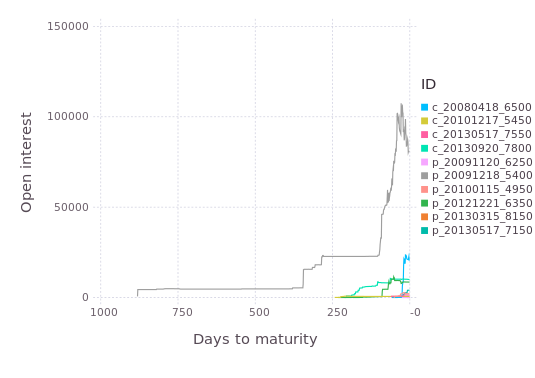

In [27]:
currPlot = plot(plotData, x=:Time_to_Maturity,  y=:Open_Interest, color=:ID, Geom.line,
Scale.x_continuous(labels=x -> @sprintf("%6.0f", -x)),
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Guide.xlabel("Days to maturity"),
Guide.ylabel("Open interest"))

In [28]:
draw(SVG("../pics/open_interest_over_time.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/open_interest_over_time.pdf", 20cm, 14cm), currPlot)

### Listed options

- count numbers of listed options each day

In [29]:
listData = join(optPrices, opts, on = :ID);
head(listData)

6x6 DataFrame
| Row | Date       | ID                | Price  | Expiry     | Strike | IsCall |
|-----|------------|-------------------|--------|------------|--------|--------|
| 1   | 2006-07-03 | "c_20060721_4500" | 1212.0 | 2006-07-21 | 4500   | true   |
| 2   | 2006-07-04 | "c_20060721_4500" | 1232.6 | 2006-07-21 | 4500   | true   |
| 3   | 2006-07-05 | "c_20060721_4500" | 1131.1 | 2006-07-21 | 4500   | true   |
| 4   | 2006-07-06 | "c_20060721_4500" | 1197.0 | 2006-07-21 | 4500   | true   |
| 5   | 2006-07-07 | "c_20060721_4500" | 1185.1 | 2006-07-21 | 4500   | true   |
| 6   | 2006-07-10 | "c_20060721_4500" | 1210.3 | 2006-07-21 | 4500   | true   |

- define function to count calls and puts separately

In [30]:
function countCallsAndPuts(x::AbstractDataFrame)
    nCalls = sum(x[:IsCall])
    nPuts = size(x, 1) - nCalls
    return [nCalls nPuts]
end

countCallsAndPuts (generic function with 1 method)

- count calls and puts and convert to `Timematr` for plotting

In [31]:
using TimeData

optsPerDate = by(listData, :Date, x -> countCallsAndPuts(x))
names!(optsPerDate, [:Date, :nCalls, :nPuts])

optsPerDateTm = Timematr(optsPerDate[:, [2, 3]], convert(Array, optsPerDate[:Date]))

Timematr{Date}(1908x2 DataFrame
| Row  | nCalls | nPuts |
|------|--------|-------|
| 1    | 455    | 481   |
| 2    | 456    | 481   |
| 3    | 457    | 481   |
| 4    | 457    | 481   |
| 5    | 457    | 481   |
| 6    | 456    | 481   |
| 7    | 456    | 482   |
| 8    | 456    | 483   |
| 9    | 457    | 486   |
| 10   | 457    | 486   |
| 11   | 458    | 486   |
⋮
| 1897 | 460    | 438   |
| 1898 | 465    | 438   |
| 1899 | 465    | 439   |
| 1900 | 466    | 439   |
| 1901 | 471    | 439   |
| 1902 | 475    | 440   |
| 1903 | 480    | 442   |
| 1904 | 486    | 447   |
| 1905 | 380    | 360   |
| 1906 | 385    | 363   |
| 1907 | 389    | 376   |
| 1908 | 390    | 379   |,[2006-07-03,2006-07-04,2006-07-05,2006-07-06,2006-07-07,2006-07-10,2006-07-11,2006-07-12,2006-07-13,2006-07-14  …  2013-12-12,2013-12-13,2013-12-16,2013-12-17,2013-12-18,2013-12-19,2013-12-20,2013-12-23,2013-12-27,2013-12-30])

In [32]:
loadPlotting()

wstHist (generic function with 4 methods)

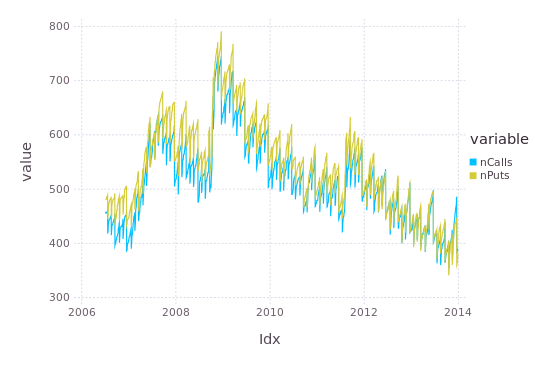

In [33]:
currPlot = gdfPlot(optsPerDateTm)

In [34]:
draw(SVG("../pics/number_of_listed_options.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/number_of_listed_options.pdf", 20cm, 14cm), currPlot)

- count number of different listed maturities

In [35]:
expiryPerDate = by(listData, :Date, x -> length(unique(x[:Expiry])))
names!(expiryPerDate, [:Date, :nExpiry])

expiryPerDateTm = Timematr(expiryPerDate[:, [2]], convert(Array, expiryPerDate[:Date]))

Timematr{Date}(1908x1 DataFrame
| Row  | nExpiry |
|------|---------|
| 1    | 11      |
| 2    | 11      |
| 3    | 11      |
| 4    | 11      |
| 5    | 11      |
| 6    | 11      |
| 7    | 11      |
| 8    | 11      |
| 9    | 12      |
| 10   | 12      |
| 11   | 12      |
⋮
| 1897 | 7       |
| 1898 | 7       |
| 1899 | 7       |
| 1900 | 7       |
| 1901 | 7       |
| 1902 | 7       |
| 1903 | 7       |
| 1904 | 7       |
| 1905 | 6       |
| 1906 | 6       |
| 1907 | 6       |
| 1908 | 6       |,[2006-07-03,2006-07-04,2006-07-05,2006-07-06,2006-07-07,2006-07-10,2006-07-11,2006-07-12,2006-07-13,2006-07-14  …  2013-12-12,2013-12-13,2013-12-16,2013-12-17,2013-12-18,2013-12-19,2013-12-20,2013-12-23,2013-12-27,2013-12-30])

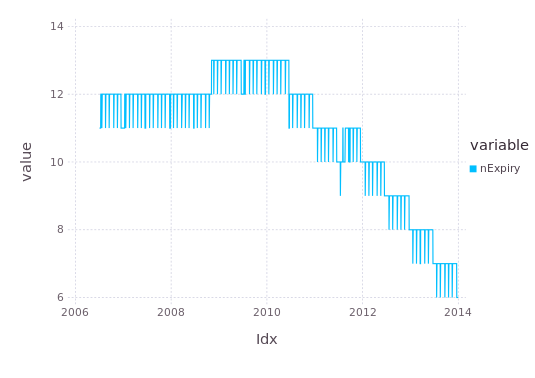

In [36]:
currPlot = gdfPlot(expiryPerDateTm)

In [37]:
draw(SVG("../pics/number_of_listed_maturities.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/number_of_listed_maturities.pdf", 20cm, 14cm), currPlot)

- get first listing for option, but exclude option price series starting at first day of sample
- they are not most likely not observed from the first day of listing

In [38]:
firstListData = join(optPrices, opts, on = :ID) |>
x -> join(x, cohortParams, on = [:Date, :Expiry])

head(firstListData)

6x8 DataFrame
| Row | Date       | ID                | Price  | Expiry     | Strike | IsCall |
|-----|------------|-------------------|--------|------------|--------|--------|
| 1   | 2006-07-03 | "c_20060721_4500" | 1212.0 | 2006-07-21 | 4500   | true   |
| 2   | 2006-07-03 | "c_20060721_4600" | 1112.3 | 2006-07-21 | 4600   | true   |
| 3   | 2006-07-03 | "c_20060721_4700" | 1012.7 | 2006-07-21 | 4700   | true   |
| 4   | 2006-07-03 | "c_20060721_4800" | 913.2  | 2006-07-21 | 4800   | true   |
| 5   | 2006-07-03 | "c_20060721_4850" | 863.5  | 2006-07-21 | 4850   | true   |
| 6   | 2006-07-03 | "c_20060721_4900" | 813.9  | 2006-07-21 | 4900   | true   |

| Row | EONIA_matched | Time_to_Maturity |
|-----|---------------|------------------|
| 1   | 0.0283102     | 0.054902         |
| 2   | 0.0283102     | 0.054902         |
| 3   | 0.0283102     | 0.054902         |
| 4   | 0.0283102     | 0.054902         |
| 5   | 0.0283102     | 0.054902         |
| 6   | 0.0283102     | 0.054902         |

- define function to get first listing of given option

In [39]:
function getFirstListing(x::AbstractDataFrame)
    firstInd = indmin(x[:Date]) 
    return x[firstInd, [:Date, :Price, :Expiry, :Strike, :IsCall, :EONIA_matched, :Time_to_Maturity]]
end

getFirstListing (generic function with 1 method)

In [40]:
firstObs = by(firstListData, :ID, getFirstListing)
head(firstObs)

6x8 DataFrame
| Row | ID                | Date       | Price  | Expiry     | Strike | IsCall |
|-----|-------------------|------------|--------|------------|--------|--------|
| 1   | "c_20060721_4500" | 2006-07-03 | 1212.0 | 2006-07-21 | 4500   | true   |
| 2   | "c_20060721_4600" | 2006-07-03 | 1112.3 | 2006-07-21 | 4600   | true   |
| 3   | "c_20060721_4700" | 2006-07-03 | 1012.7 | 2006-07-21 | 4700   | true   |
| 4   | "c_20060721_4800" | 2006-07-03 | 913.2  | 2006-07-21 | 4800   | true   |
| 5   | "c_20060721_4850" | 2006-07-03 | 863.5  | 2006-07-21 | 4850   | true   |
| 6   | "c_20060721_4900" | 2006-07-03 | 813.9  | 2006-07-21 | 4900   | true   |

| Row | EONIA_matched | Time_to_Maturity |
|-----|---------------|------------------|
| 1   | 0.0283102     | 0.054902         |
| 2   | 0.0283102     | 0.054902         |
| 3   | 0.0283102     | 0.054902         |
| 4   | 0.0283102     | 0.054902         |
| 5   | 0.0283102     | 0.054902         |
| 6   | 0.0283102     | 0.054902         |

- add time to maturity in days

In [41]:
daysToMat = DataFrame(Days_to_Maturity = round(firstObs[:Time_to_Maturity] * 255))
firstObsExt = [firstObs daysToMat]
head(firstObsExt)

6x9 DataFrame
| Row | ID                | Date       | Price  | Expiry     | Strike | IsCall |
|-----|-------------------|------------|--------|------------|--------|--------|
| 1   | "c_20060721_4500" | 2006-07-03 | 1212.0 | 2006-07-21 | 4500   | true   |
| 2   | "c_20060721_4600" | 2006-07-03 | 1112.3 | 2006-07-21 | 4600   | true   |
| 3   | "c_20060721_4700" | 2006-07-03 | 1012.7 | 2006-07-21 | 4700   | true   |
| 4   | "c_20060721_4800" | 2006-07-03 | 913.2  | 2006-07-21 | 4800   | true   |
| 5   | "c_20060721_4850" | 2006-07-03 | 863.5  | 2006-07-21 | 4850   | true   |
| 6   | "c_20060721_4900" | 2006-07-03 | 813.9  | 2006-07-21 | 4900   | true   |

| Row | EONIA_matched | Time_to_Maturity | Days_to_Maturity |
|-----|---------------|------------------|------------------|
| 1   | 0.0283102     | 0.054902         | 14.0             |
| 2   | 0.0283102     | 0.054902         | 14.0             |
| 3   | 0.0283102     | 0.054902         | 14.0             |
| 4   | 0.0283102     | 0.054902         | 14.0             |
| 5   | 0.0283102     | 0.054902         | 14.0             |
| 6   | 0.0283102     | 0.054902         | 14.0             |

- remove options starting at sample begin because most likely we do not have their real first listing

In [42]:
cleanFirstObs = firstObsExt[!(firstObsExt[:Date] .== Date(2006,7,3)), :]
head(cleanFirstObs)

6x9 DataFrame
| Row | ID                | Date       | Price  | Expiry     | Strike | IsCall |
|-----|-------------------|------------|--------|------------|--------|--------|
| 1   | "c_20060818_4500" | 2006-07-20 | 1057.5 | 2006-08-18 | 4500   | true   |
| 2   | "c_20061020_4200" | 2006-10-04 | 1856.7 | 2006-10-20 | 4200   | true   |
| 3   | "c_20061020_4250" | 2006-08-17 | 1607.3 | 2006-10-20 | 4250   | true   |
| 4   | "c_20061020_4500" | 2006-09-14 | 1423.6 | 2006-10-20 | 4500   | true   |
| 5   | "c_20061020_4600" | 2006-09-18 | 1340.8 | 2006-10-20 | 4600   | true   |
| 6   | "c_20061020_4700" | 2006-09-14 | 1224.8 | 2006-10-20 | 4700   | true   |

| Row | EONIA_matched | Time_to_Maturity | Days_to_Maturity |
|-----|---------------|------------------|------------------|
| 1   | 0.0291087     | 0.0823529        | 21.0             |
| 2   | 0.0322168     | 0.0470588        | 12.0             |
| 3   | 0.0312314     | 0.180392         | 46.0             |
| 4   | 0.0311206     | 0.101961         | 26.0             |
| 5   | 0.0311395     | 0.0941176        | 24.0             |
| 6   | 0.0311206     | 0.101961         | 26.0             |

- how many options are removed because their history is not fully observed?

In [43]:
[size(firstObsExt, 1) size(cleanFirstObs, 1)]

1x2 Array{Int64,2}:
 12917  11981

In [44]:
size(firstObsExt, 1) - size(cleanFirstObs, 1)

936

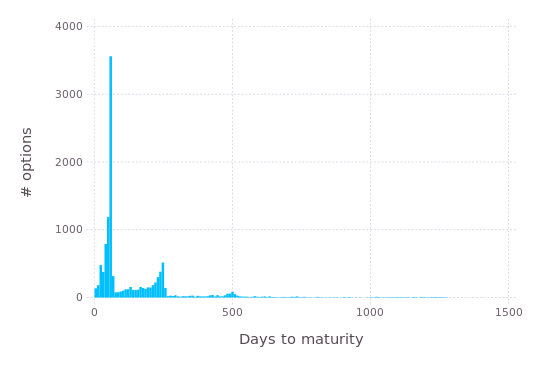

In [45]:
currPlot = Gadfly.plot(cleanFirstObs, x="Days_to_Maturity", Gadfly.Geom.histogram,
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Guide.xlabel("Days to maturity"),
Guide.ylabel("# options"))

In [46]:
draw(SVG("../pics/maturity_at_first_list.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/maturity_at_first_list.pdf", 20cm, 14cm), currPlot)

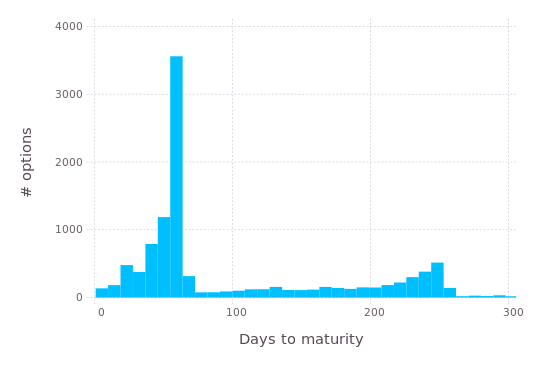

In [47]:
currPlot = Gadfly.plot(cleanFirstObs, x="Days_to_Maturity", Gadfly.Geom.histogram,
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), maxvalue = 270),
Guide.xlabel("Days to maturity"),
Guide.ylabel("# options"))

In [48]:
draw(SVG("../pics/maturity_at_first_list_zoomed.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/maturity_at_first_list_zoomed.pdf", 20cm, 14cm), currPlot)

### Price inconsistencies

In [49]:
consistData = join(optPrices, opts, on = :ID) |>
x -> join(x, cohortParams, on = [:Date, :Expiry]) |>
x -> join(x, daxVals, on = :Date)

head(consistData)

6x9 DataFrame
| Row | Date       | ID                | Price  | Expiry     | Strike | IsCall |
|-----|------------|-------------------|--------|------------|--------|--------|
| 1   | 2006-07-03 | "c_20060721_4500" | 1212.0 | 2006-07-21 | 4500   | true   |
| 2   | 2006-07-03 | "c_20060721_4600" | 1112.3 | 2006-07-21 | 4600   | true   |
| 3   | 2006-07-03 | "c_20060721_4700" | 1012.7 | 2006-07-21 | 4700   | true   |
| 4   | 2006-07-03 | "c_20060721_4800" | 913.2  | 2006-07-21 | 4800   | true   |
| 5   | 2006-07-03 | "c_20060721_4850" | 863.5  | 2006-07-21 | 4850   | true   |
| 6   | 2006-07-03 | "c_20060721_4900" | 813.9  | 2006-07-21 | 4900   | true   |

| Row | EONIA_matched | Time_to_Maturity | DAX     |
|-----|---------------|------------------|---------|
| 1   | 0.0283102     | 0.054902         | 5712.69 |
| 2   | 0.0283102     | 0.054902         | 5712.69 |
| 3   | 0.0283102     | 0.054902         | 5712.69 |
| 4   | 0.0283102     | 0.054902         | 5712.69 |
| 5   | 0.0283102     | 0.054902         | 5712.69 |
| 6   | 0.0283102     | 0.054902         | 5712.69 |

In [50]:
function callLowBound(s::Float64, k::Int, r::Float64, T::Float64)
    return maximum([s - k*exp(-r*T), 0])
end

function putLowBound(s::Float64, k::Int, r::Float64, T::Float64)
    return maximum([k*exp(-r*T) - s, 0])
end

putLowBound (generic function with 1 method)

In [51]:
function priceBounds(x::DataFrame)
    nObs = size(x, 1)
    lowBounds, upBounds = (zeros(nObs), zeros(nObs))
    for ii=1:nObs
        S, K, r, T = x[ii, :DAX], x[ii, :Strike], x[ii, :EONIA_matched], x[ii, :Time_to_Maturity]
        if x[ii, :IsCall]
            lowBounds[ii] = callLowBound(S, K, r, T)
            upBounds[ii] = S
        else
            lowBounds[ii] = putLowBound(S, K, r, T)
            upBounds[ii] = K*exp(-r*T)
        end
    end
    return (lowBounds, upBounds)         
end

priceBounds (generic function with 1 method)

In [52]:
lowBounds, upBounds = priceBounds(consistData)

([1219.68,1119.83,1019.99,920.145,870.222,820.3,770.378,720.455,670.533,620.611  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.9496,194.404,293.859],[5712.69,5712.69,5712.69,5712.69,5712.69,5712.69,5712.69,5712.69,5712.69,5712.69  …  9199.56,9249.29,9348.75,9398.47,9448.2,9497.93,9547.65,9647.11,9746.56,9846.02])

In [53]:
consistData[:LowBound] = lowBounds
consistData[:UpBound] = upBounds

head(consistData)

6x11 DataFrame
| Row | Date       | ID                | Price  | Expiry     | Strike | IsCall |
|-----|------------|-------------------|--------|------------|--------|--------|
| 1   | 2006-07-03 | "c_20060721_4500" | 1212.0 | 2006-07-21 | 4500   | true   |
| 2   | 2006-07-03 | "c_20060721_4600" | 1112.3 | 2006-07-21 | 4600   | true   |
| 3   | 2006-07-03 | "c_20060721_4700" | 1012.7 | 2006-07-21 | 4700   | true   |
| 4   | 2006-07-03 | "c_20060721_4800" | 913.2  | 2006-07-21 | 4800   | true   |
| 5   | 2006-07-03 | "c_20060721_4850" | 863.5  | 2006-07-21 | 4850   | true   |
| 6   | 2006-07-03 | "c_20060721_4900" | 813.9  | 2006-07-21 | 4900   | true   |

| Row | EONIA_matched | Time_to_Maturity | DAX     | LowBound | UpBound |
|-----|---------------|------------------|---------|----------|---------|
| 1   | 0.0283102     | 0.054902         | 5712.69 | 1219.68  | 5712.69 |
| 2   | 0.0283102     | 0.054902         | 5712.69 | 1119.83  | 5712.69 |
| 3   | 0.0283102     | 0.054902         | 5712.69 | 1019.99  | 5712.69 |
| 4   | 0.0283102     | 0.054902         | 5712.69 | 920.145  | 5712.69 |
| 5   | 0.0283102     | 0.054902         | 5712.69 | 870.222  | 5712.69 |
| 6   | 0.0283102     | 0.054902         | 5712.69 | 820.3    | 5712.69 |

- no prices are above the upper no arbitrage bounds

In [54]:
sum(consistData[:Price] .> consistData[:UpBound])/size(consistData, 1)

0.0

- some prices are below the lower no arbitrage bounds

In [55]:
sum(consistData[:Price] .< consistData[:LowBound])/size(consistData, 1)

0.042794804676640354

- split into puts and calls

In [88]:
tooLowPrices = consistData[consistData[:Price] .< consistData[:LowBound], :]

size(tooLowPrices[tooLowPrices[:IsCall], 1], 1), size(tooLowPrices[!tooLowPrices[:IsCall], 1], 1)

(63191,23474)

- all arbitrage prices are from in the money options

In [92]:
absMon = tooLowPrices[:DAX] .- tooLowPrices[:Strike]
absMon[!tooLowPrices[:IsCall]] = absMon[!tooLowPrices[:IsCall]]*(-1)

any(absMon .< 0)

false

### Put-Call parity

p = c + K - S

p = c + Ke^{-rT} - S_{0}

- find observations of same day, strike and maturity but different types (one call, one put): group by Date, Strike and Expiry

In [95]:
kk = by(consistData, [:Date, :Strike, :Expiry], x -> x)
typeof(kk)

DataFrame (constructor with 11 methods)

In [97]:
head(kk)

6x14 DataFrame
| Row | Date       | Strike | Expiry     | Date_1     | ID                |
|-----|------------|--------|------------|------------|-------------------|
| 1   | 2006-07-03 | 1600   | 2008-12-19 | 2006-07-03 | "c_20081219_1600" |
| 2   | 2006-07-03 | 1800   | 2006-12-15 | 2006-07-03 | "c_20061215_1800" |
| 3   | 2006-07-03 | 1800   | 2006-12-15 | 2006-07-03 | "p_20061215_1800" |
| 4   | 2006-07-03 | 1800   | 2007-06-15 | 2006-07-03 | "c_20070615_1800" |
| 5   | 2006-07-03 | 1800   | 2007-06-15 | 2006-07-03 | "p_20070615_1800" |
| 6   | 2006-07-03 | 1800   | 2007-12-21 | 2006-07-03 | "c_20071221_1800" |

| Row | Price  | Expiry_1   | Strike_1 | IsCall | EONIA_matched |
|-----|--------|------------|----------|--------|---------------|
| 1   | 4251.1 | 2008-12-19 | 1600     | true   | 0.0344691     |
| 2   | 3931.1 | 2006-12-15 | 1800     | true   | 0.0316676     |
| 3   | 0.1    | 2006-12-15 | 1800     | false  | 0.0316676     |
| 4   | 3963.8 | 2007-06-15 | 1800     | true   | 0.0342513     |
| 5   | 0.1    | 2007-06-15 | 1800     | false  | 0.0342513     |
| 6   | 3999.2 | 2007-12-21 | 1800     | true   | 0.0344691     |

| Row | Time_to_Maturity | DAX     | LowBound | UpBound |
|-----|------------------|---------|----------|---------|
| 1   | 2.46667          | 5712.69 | 4243.11  | 5712.69 |
| 2   | 0.466667         | 5712.69 | 3939.1   | 5712.69 |
| 3   | 0.466667         | 5712.69 | 0.0      | 1773.59 |
| 4   | 0.94902          | 5712.69 | 3970.26  | 5712.69 |
| 5   | 0.94902          | 5712.69 | 0.0      | 1742.43 |
| 6   | 1.47843          | 5712.69 | 4002.12  | 5712.69 |

In [100]:
function prevPCMatch(df::DataFrame, ii::Int)
    prevMatch = false
    if ((da[ii-1, :Date] == da[ii, :Date]) & (da[ii-1, :Strike] == da[ii, :Strike]) & (da[ii-1, :Expiry] == da[ii, :Expiry]))
        prevMatch = true
    end
    return prevMatch
end

function prevPCMatch(df::DataFrame, ii::Int)
    prevMatch = false
    if ((da[ii+1, :Date] == da[ii, :Date]) & (da[ii+1, :Strike] == da[ii, :Strike]) & (da[ii+1, :Expiry] == da[ii, :Expiry]))
        prevMatch = true
    end
    return prevMatch
end

prevPCMatch (generic function with 1 method)

In [ ]:
pcPrice = zeros(size(consistData, 1))
for ii=1:size(consistData, 1)
    if ii=1
        # do nothing
        else if ii = nObs
        if prevPCMatch(kk, ii)
            # calculate pc price
        end
    end
end

### Move following analysis to local properties script

In [63]:
liquData = readtable("../data/rel_data/liquData.csv")

2025129x5 DataFrame
| Row     | Date         | ID                | VolRanks  | DeltaOI | OiRanks   |
|---------|--------------|-------------------|-----------|---------|-----------|
| 1       | "2006-07-03" | "c_20060721_4500" | 0.0       | 127.0   | 0.209992  |
| 2       | "2006-07-03" | "c_20060721_4600" | 0.0       | 235.0   | 0.277653  |
| 3       | "2006-07-03" | "c_20060721_4700" | 0.0       | 212.0   | 0.266841  |
| 4       | "2006-07-03" | "c_20060721_4800" | 0.0       | 2749.0  | 0.595186  |
| 5       | "2006-07-03" | "c_20060721_4850" | 0.0       | 122.0   | 0.206318  |
| 6       | "2006-07-03" | "c_20060721_4900" | 0.0       | 413.0   | 0.343496  |
| 7       | "2006-07-03" | "c_20060721_4950" | 0.0       | 338.0   | 0.318213  |
| 8       | "2006-07-03" | "c_20060721_5000" | 0.168279  | 1448.0  | 0.509647  |
| 9       | "2006-07-03" | "c_20060721_5050" | 0.0       | 1680.0  | 0.529859  |
| 10      | "2006-07-03" | "c_20060721_5100" | 0.0600835 | 704.0   | 0.416121  |
| 11      | "2006-07-03" | "c_20060721_5150" | 0.0       | 956.0   | 0.452768  |
⋮
| 2025118 | "2013-12-30" | "p_20141219_9100" | 0.0       | 0.0     | 0.364819  |
| 2025119 | "2013-12-30" | "p_20141219_9200" | 0.0997008 | 0.0     | 0.767259  |
| 2025120 | "2013-12-30" | "p_20141219_9250" | 0.0       | 0.0     | 0.0642853 |
| 2025121 | "2013-12-30" | "p_20141219_9300" | 0.0       | 0.0     | 0.529706  |
| 2025122 | "2013-12-30" | "p_20141219_9400" | 0.0       | 0.0     | 0.529075  |
| 2025123 | "2013-12-30" | "p_20141219_9450" | 0.0       | 0.0     | 0.035176  |
| 2025124 | "2013-12-30" | "p_20141219_9500" | 0.168277  | 5.0     | 0.653665  |
| 2025125 | "2013-12-30" | "p_20141219_9550" | 0.0       | 0.0     | 0.0159684 |
| 2025126 | "2013-12-30" | "p_20141219_9600" | 0.348044  | 6.0     | 0.234012  |
| 2025127 | "2013-12-30" | "p_20141219_9700" | 0.0       | 0.0     | 0.354314  |
| 2025128 | "2013-12-30" | "p_20141219_9800" | 0.428005  | 50.0    | 0.149     |
| 2025129 | "2013-12-30" | "p_20141219_9900" | 0.428006  | 50.0    | 0.133827  |

In [61]:
function convertColToDates!(df::DataFrame, col::Symbol)
    dats = Date(convert(Array, df[:, col]))
    df[col] = dats
end

convertColToDates! (generic function with 1 method)

In [65]:
@time convertColToDates!(liquData, :Date);

elapsed time: 164.567787574 seconds (5419744236 bytes allocated, 91.01% gc time)


2025129-element Array{Date,1}:
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 2006-07-03
 ⋮         
 2013-12-30
 2013-12-30
 2013-12-30
 2013-12-30
 2013-12-30
 2013-12-30
 2013-12-30
 2013-12-30
 2013-12-30
 2013-12-30
 2013-12-30
 2013-12-30

In [80]:
tooLowPatterns = join(tooLowPrices[[:Date, :ID, :IsCall, :Time_to_Maturity]], mnyness, on = [:Date, :ID]) |>
x -> join(x, liquData, on = [:Date, :ID]) |>
x -> join(x, addObs, on = [:Date, :ID]) |>
x -> x[[:Date, :ID, :IsCall, :Time_to_Maturity, :Volume, :LogMny, :SclMny]]

tooLowPatterns[:Days_to_Maturity] = tooLowPatterns[:Time_to_Maturity]*255

head(tooLowPatterns)

6x8 DataFrame
| Row | Date       | ID                | IsCall | Time_to_Maturity | Volume |
|-----|------------|-------------------|--------|------------------|--------|
| 1   | 2006-07-03 | "c_20060721_4500" | true   | 0.054902         | 0      |
| 2   | 2006-07-04 | "c_20060721_4500" | true   | 0.0509804        | 0      |
| 3   | 2006-07-05 | "c_20060721_4500" | true   | 0.0470588        | 0      |
| 4   | 2006-07-06 | "c_20060721_4500" | true   | 0.0431373        | 2      |
| 5   | 2006-07-07 | "c_20060721_4500" | true   | 0.0392157        | 0      |
| 6   | 2006-07-10 | "c_20060721_4500" | true   | 0.0352941        | 0      |

| Row | LogMny   | SclMny  | Days_to_Maturity |
|-----|----------|---------|------------------|
| 1   | 0.238613 | 1.01836 | 14.0             |
| 2   | 0.241465 | 1.06943 | 13.0             |
| 3   | 0.223256 | 1.02916 | 12.0             |
| 4   | 0.235594 | 1.13432 | 11.0             |
| 5   | 0.233199 | 1.1776  | 10.0             |
| 6   | 0.237497 | 1.26417 | 9.0              |

In [78]:
size(tooLowPatterns)

(86665,7)

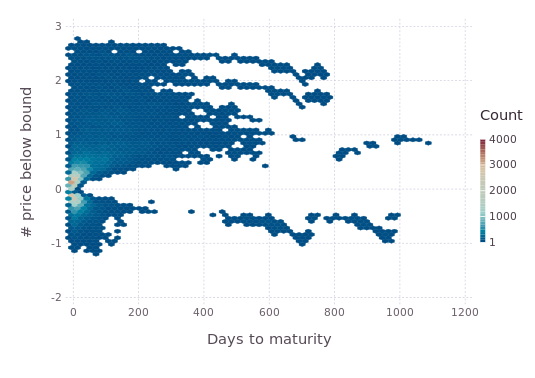

In [74]:
currPlot = Gadfly.plot(tooLowPatterns, x=:Days_to_Maturity, y=:LogMny, Geom.hexbin(xbincount=100, ybincount=100),
Scale.x_continuous(minvalue=0, maxvalue = 1200),
Guide.xlabel("Days to maturity"),
Guide.ylabel("# price below bound"))

In [75]:
draw(SVG("../pics/prices_below_bound.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/prices_below_bound.pdf", 20cm, 14cm), currPlot)

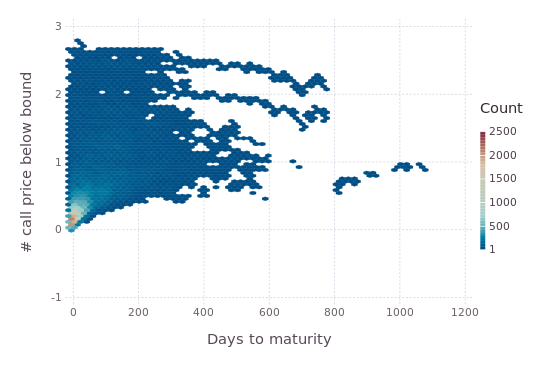

In [83]:
currPlot = Gadfly.plot(tooLowPatterns[tooLowPatterns[:IsCall], :], x=:Days_to_Maturity, y=:LogMny, Geom.hexbin(xbincount=100, ybincount=100),
Scale.x_continuous(minvalue=0, maxvalue = 1200),
Guide.xlabel("Days to maturity"),
Guide.ylabel("# call price below bound"))

In [84]:
draw(SVG("../pics/call_prices_below_bound.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/call_prices_below_bound.pdf", 20cm, 14cm), currPlot)

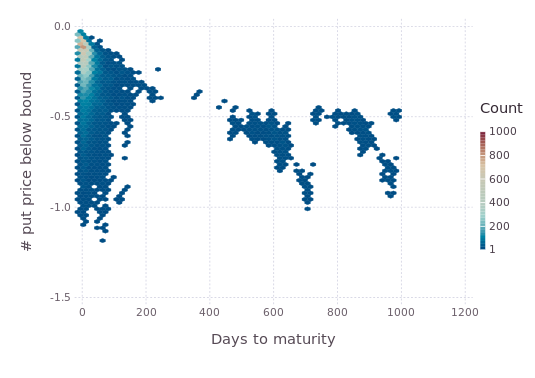

In [85]:
currPlot = Gadfly.plot(tooLowPatterns[!tooLowPatterns[:IsCall], :], x=:Days_to_Maturity, y=:LogMny, Geom.hexbin(xbincount=100, ybincount=100),
Scale.x_continuous(minvalue=0, maxvalue = 1200),
Guide.xlabel("Days to maturity"),
Guide.ylabel("# put price below bound"))

In [86]:
draw(SVG("../pics/put_prices_below_bound.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/put_prices_below_bound.pdf", 20cm, 14cm), currPlot)